# CRP Tutorial Dataset Crimes in Boston

En este documento se estudiará el dataset "Crimes in Boston".

Fuente: https://www.kaggle.com/AnalyzeBoston/crimes-in-boston

Uno de los pasos más importantes dentro de data science (y en general, cualquier problema que implique su uso) es conocer la base de datos.

Los conjuntos de datos que obtenemos (puesto que usualmente se trabaja con datos recopilados por otra persona o grupo de personas) no siempre cuentan con un formato o una completitud que permitan un análisis correcto y veraz.

El proceso de limpieza de datos (preprocesamiento) consiste en eliminar o reemplazar elementos del conjunto de datos de forma que los resultados finales se afecten lo menos posible, usualmente se utiliza la librería Pandas si se está trabajando en Python para esta tarea.

### Espacio para importar librerías.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Espacio para escribir funciones que se utilizarán en el notebook.

In [0]:
#Función para imprimir las primeras 5 filas de una variable.
def print_five_rows(name_column):
    return df[name_column][0:5]

#Función para obtener la información de una variable
def describe_column(name_column):
    return df[name_column].describe()

### Análisis del dataset.

Lectura del dataset.

In [0]:
df = pd.read_csv("res/crime.csv", encoding='latin-1')

#mostrar las primeras 5 filas del dataframe

df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [0]:
#Conocer las varaibles que conforman mi dataset
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

Con la lectura y muestra del dataset conocemos parte de nuestros datos, a la tabla que se observa arriba se le conoce como dataframe.

Es muy importante conocer información adicional de nuestro conjunto de datos, por ejemplo, sus dimensiones totales (para conocer el número de entradas y el número de variables)

In [0]:
#dimensiones del dataframe
df.shape

(319073, 17)

Aún así, no conocemos si existen duplicados, valores NaN u otros que puedan ser ruido para nuestro conjunto de datos. Analicemos estos casos.

In [0]:
#buscar duplicados en el dataframe
print(df.shape, df.drop_duplicates().shape)

print("Hay", df.shape[0]-df.drop_duplicates().shape[0], "duplicados en el dataframe")

(319073, 17) (319050, 17)
Hay 23 duplicados en el dataframe


In [0]:
# eliminar los duplicados
df = df.drop_duplicates()

In [0]:
#información del dataset sobre valores NaN o nulos
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318031
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19998
Long                    19998
Location                    0
dtype: int64

Podemos observar que la variable "SHOOTING" tiene demasiados valores nulos, también hay algunos en "STREET", "DISTRICT", "Long" y "Lat".

Para poder realizar un análisis correcto de nuestro conjunto de datos, es necesario realizar un procesamiento de estos.

#### NOTA: La librería pandas incluye un comando llamado value_counts(), es muy útil puesto que permite la visualización de ocurrencias de una variable IGNORANDO los valores NA sin eliminarlos del dataframe, esto permite realizar un análisis preliminar del conjunto de datos utilizando gráficos sin eliminar ocurrencias, sin embargo, cuando se vaya a plantear el modelo de clasificación, estos datos deben eliminarse.

### Análisis de las variables.

Una vez se tiene un conocimiento general del conjunto de datos, se procede con el estudio de las variables individualmente, ¿Qué información contiene cada variable? ¿Es numérica, booleana o acaso es un string? ¿Realmente la información contenida allí me es útil?

A continuación, estudiaremos tres de las 17 variables del dataframe, sin embargo, la mecánica es muy parecida para cualquier otra variable que haya consignada.

####  (Se utilizan las funciones consignadas en la parte superior del notebook)

#### INCIDENT_NUMBER

In [0]:
print_five_rows("INCIDENT_NUMBER")

0    I182070945
1    I182070943
2    I182070941
3    I182070940
4    I182070938
Name: INCIDENT_NUMBER, dtype: object

In [0]:
describe_column("INCIDENT_NUMBER")

count         319050
unique        282517
top       I162030584
freq              13
Name: INCIDENT_NUMBER, dtype: object

Ahora conocemos que la variable INCIDENT_NUMBER posee 319050 entradas con 282517 valores únicos.

#### DISTRICT

In [0]:
print_five_rows("DISTRICT")

0    D14
1    C11
2     D4
3     D4
4     B3
Name: DISTRICT, dtype: object

In [0]:
describe_column("DISTRICT")

count     317285
unique        12
top           B2
freq       49940
Name: DISTRICT, dtype: object

Dado que DISTRICT tiene algunos valores NA, posee menos entradas que una variable sin ruido, adicionalmente tiene 12 valores únicos.

In [0]:
df["DISTRICT"].unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

#### OFFENSE_DESCRIPTION

Con esta categoría específica, se pueden conocer todos los tipos de crímenes cometidos.

In [0]:
print_five_rows("OFFENSE_DESCRIPTION")

0      LARCENY ALL OTHERS
1               VANDALISM
2     TOWED MOTOR VEHICLE
3    INVESTIGATE PROPERTY
4    INVESTIGATE PROPERTY
Name: OFFENSE_DESCRIPTION, dtype: object

In [0]:
describe_column("OFFENSE_DESCRIPTION")

count                            319050
unique                              244
top       SICK/INJURED/MEDICAL - PERSON
freq                              18783
Name: OFFENSE_DESCRIPTION, dtype: object

In [0]:
df['OFFENSE_DESCRIPTION'].unique()

array(['LARCENY ALL OTHERS', 'VANDALISM', 'TOWED MOTOR VEHICLE',
       'INVESTIGATE PROPERTY',
       'M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY', 'AUTO THEFT',
       'VERBAL DISPUTE', 'ROBBERY - STREET',
       'FIRE REPORT - HOUSE, BUILDING, ETC.', 'THREATS TO DO BODILY HARM',
       'PROPERTY - LOST', 'SICK/INJURED/MEDICAL - PERSON',
       'DEMONSTRATIONS/RIOT', 'LARCENY THEFT FROM MV - NON-ACCESSORY',
       'M/V ACCIDENT - OTHER', 'M/V ACCIDENT - PERSONAL INJURY',
       'BURGLARY - RESIDENTIAL - NO FORCE',
       'M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'ASSAULT SIMPLE - BATTERY',
       'VIOL. OF RESTRAINING ORDER W NO ARREST',
       'VAL - VIOLATION OF AUTO LAW - OTHER',
       'VAL - OPERATING AFTER REV/SUSP.', 'HARASSMENT',
       'BALLISTICS EVIDENCE/FOUND', 'PROPERTY - FOUND',
       'LARCENY SHOPLIFTING', 'SERVICE TO OTHER PD INSIDE OF MA.',
       'FIRE REPORT/ALARM - FALSE',
       'DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP', 'WARRANT ARREST',
       'DR

Es importante realizar una revisión exhaustiva de la información contenida en el conjunto de datos, tal como se realiza en los ejemplos anteriores.

Todo esto se realiza ANTES de plantear un modelo puesto que sus resultados dependen del estudio del conjunto de datos.

### Visualización.

Apoyados en la función value_counts() que nos ofrece la librería Pandas de Python, podemos obtener gráficos de nuestros datos ignorando los molestos valores NA.

Usualmente los gráficos muestran la información mejor que las tablas, por ende, son el canal de comunicación entre el dataframe y cualquier persona.

Por ejemplo, construyamos un gráfico de barras que contenga la siguiente información:

#### Número de crímenes vs Distrito de Boston

Text(0, 0.5, 'Número de crímenes')

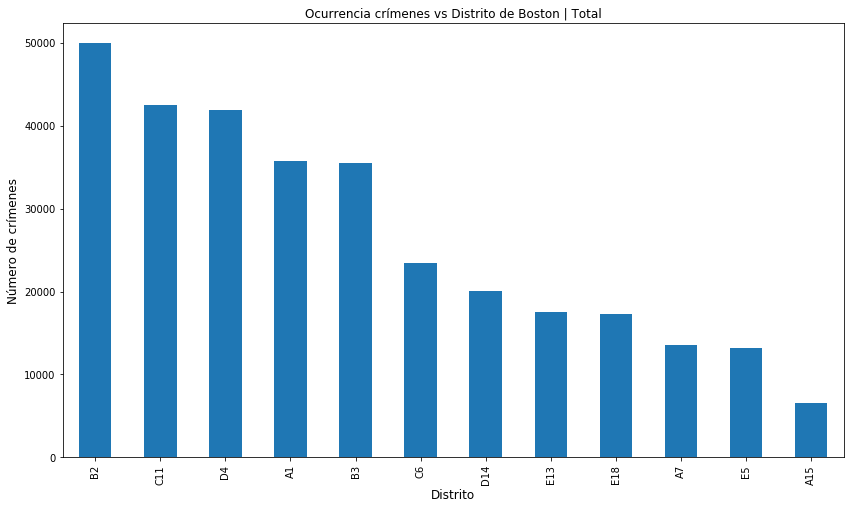

In [0]:
#Ignorar los valores NA consignados en la información y proceder con los valores únicos conocidos
distrito = df["DISTRICT"].value_counts()

#gráfico de barras
ax = distrito.plot(kind = "bar", figsize=(14,8), title = "Ocurrencia crímenes vs Distrito de Boston | Total")
ax.set_xlabel("Distrito", fontsize=12)
ax.set_ylabel("Número de crímenes", fontsize=12)

Este tipo de gráficos permiten al usuario visualizar fácilmente qué está ocurriendo con los datos, por ejemplo, ahora según la información proveniente de la variable "DISTRITO", el distrito donde ocurren más crímenes es el B2 y, el menos peligroso es el A15.

Gracias a esto, es posible comenzar a concluir respecto a la información consignada.

#### Análisis de crímenes por distrito según el año.

Por ejemplo, otra manera de visualizar las ocurrencias de crímenes, es combinando la información obtenida anteriormente con el año consignado, para ello analicemos de qué año a qué año va nuestra base de datos y con base en ello, construyamos un código que nos permita visualizar ocurrencias por distrito según el año que escoja el usuario.

In [0]:
# análisis variable año

print_five_rows("YEAR")

0    2018
1    2018
2    2018
3    2018
4    2018
Name: YEAR, dtype: int64

In [0]:
df['YEAR'].unique()

array([2018, 2017, 2016, 2015], dtype=int64)

Entre 2015 y 2018. A continuación, creemos una variable llamada "año" y en ella consignemos cualquier año entre estos 4, realicemos un gráfico de barras y visualicemos la información.

Text(0, 0.5, 'Número de crímenes')

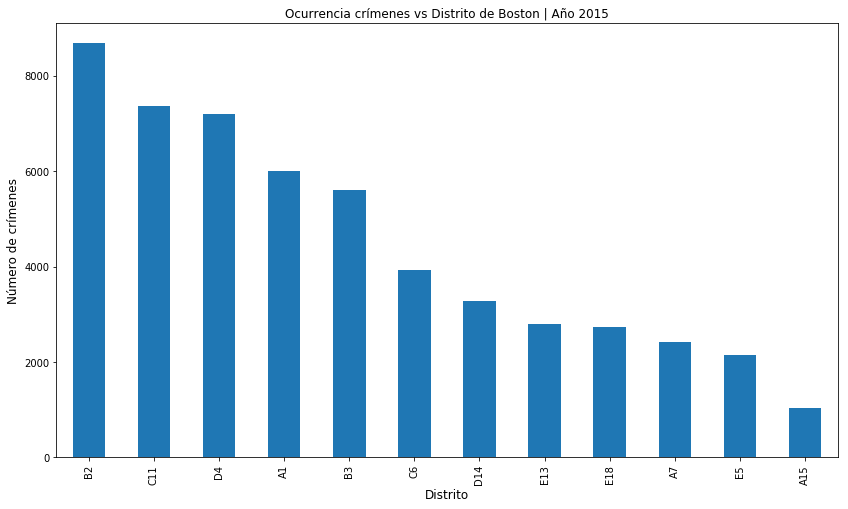

In [0]:
año = 2015
year = df["DISTRICT"].loc[df["YEAR"]==año].value_counts()

#gráfico de barras
bx = year.plot(kind = "bar", figsize=(14,8), title = "Ocurrencia crímenes vs Distrito de Boston | Año " + str(año))
bx.set_xlabel("Distrito", fontsize=12)
bx.set_ylabel("Número de crímenes", fontsize=12)

Prueba cambiando cada año para observar la diferencia entre las ocurrencias en ese periodo de tiempo.

Se utiliza la función "loc" para acceder a un grupo de columnas y filas que contengan la información contenida en "año" dentro de la columna "YEAR" para posteriormente realizar una intersección con el conjunto "DISTRICT".

Estas y muchas más combinaciones pueden realizarse, depende de la naturaleza del problema y la necesidad del usuario.

### Creación de nuevas variables.

Los dataframe de Pandas permiten adicionar nuevas variables a la información existente, esto puede ser muy útil en caso de que se busque conocer tendencias adicionales que estan implícitas en los datos.

Por ejemplo, ¿Será posible crear dos variables para nuestro dataframe que indiquen día o noche?

Esto puede ser muy útil para saber en qué momento del día es mayor la ocurrencia de crímenes.

Fuente: https://www.timeanddate.com/sun/usa/boston

Inicialmente, añadamos dos columnas nuevas al dataframe.

In [0]:
df['Day'] = 0
df['Night'] = 0

A continuación, vamos a crear horarios de día o noche para nuestros meses (recordemos las estaciones)

In [0]:
# Enero
df['Day'].loc[(df['MONTH'] == 1) & (df['HOUR'] >= 6) & (df['HOUR'] <= 18)] = 1

# Febrero
df['Day'].loc[(df['MONTH'] == 2) & (df['HOUR'] >= 6) & (df['HOUR'] <= 19)] = 1

# Marzo
df['Day'].loc[(df['MONTH'] == 3) & (df['HOUR'] >= 6) & (df['HOUR'] <= 20)] = 1

# Abril
df['Day'].loc[(df['MONTH'] == 4) & (df['HOUR'] >= 5) & (df['HOUR'] <= 20)] = 1

# Mayo
df['Day'].loc[(df['MONTH'] == 5) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Junio
df['Day'].loc[(df['MONTH'] == 6) & (df['HOUR'] >= 4) & (df['HOUR'] <= 21)] = 1

# Julio
df['Day'].loc[(df['MONTH'] == 7) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Agosto
df['Day'].loc[(df['MONTH'] == 8) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Septiembre
df['Day'].loc[(df['MONTH'] == 9) & (df['HOUR'] >= 6) & (df['HOUR'] <= 20)] = 1

# Octubre
df['Day'].loc[(df['MONTH'] == 10) & (df['HOUR'] >= 6) & (df['HOUR'] <= 19)] = 1

# Noviembre
df['Day'].loc[(df['MONTH'] == 11) & (df['HOUR'] >= 6) & (df['HOUR'] <= 17)] = 1

# Diciembre
df['Day'].loc[(df['MONTH'] == 12) & (df['HOUR'] >= 7) & (df['HOUR'] <= 17)] = 1

Ahora que conocemos cuándo estaba de día, gracias a la información consignada en "MONTH" y en "HOUR", podemos deducir cuándo era de noche.

In [0]:
#observar la nueva variable "Day"

df["Day"].head()

0    1
1    0
2    1
3    0
4    0
Name: Day, dtype: int64

Aquellos valores 0 indican que no se cumple la condición de horas que utilizamos anteriormente para indicar que era de día.

Ahora, simplemente utilizando el comando loc, una vez más, construimos la columna "Night".

In [0]:
df['Night'].loc[df['Day']==0]=1

df["Night"].head()

0    0
1    1
2    0
3    1
4    1
Name: Night, dtype: int64

Text(0, 0.5, 'Número de crímenes')

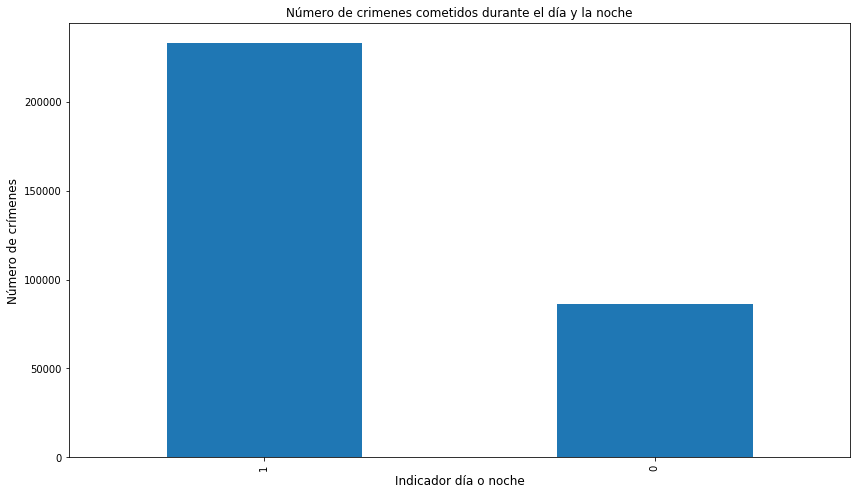

In [0]:
dia = df["Day"].value_counts()

#gráfico de barras
cx = dia.plot(kind = "bar", figsize=(14,8), title = "Número de crimenes cometidos durante el día y la noche")
cx.set_xlabel("Indicador día o noche", fontsize=12)
cx.set_ylabel("Número de crímenes", fontsize=12)

Recordemos que 1 significa día y 0 significa noche dentro de la columna "Day" que fue la que utilizamos.

Lo cual, permite concluir que la mayor cantidad de crímenes ocurrió durante el día.

### Nota: ¿Qué sucede con la Variable "SHOOTINGS"? ¿Acaso todos los valores NaN son inútiles o pueden indicar algo diferente?

## Modelamiento.

Este dataframe no contiene una columna de "clase" propiamente dada, por lo tanto debemos escoger alguna.

Nuestro conjunto Y será "OFFENSE_CODE_GROUP" 

mientras que nuestro conjunto X será 

'DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK', 'HOUR','Lat','Long', 'Day','Night'

In [0]:
#Observemos la variable Y
df["OFFENSE_CODE_GROUP"].value_counts().head(15)

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Drug Violation                     16545
Simple Assault                     15826
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Investigate Property               11124
Larceny From Motor Vehicle         10847
Property Lost                       9751
Warrant Arrests                     8392
Aggravated Assault                  7807
Name: OFFENSE_CODE_GROUP, dtype: int64

Escojamos las primeras 12 ocurrencias con mayor cantidad de repeticiones y creemos un dataframe para el modelo.

In [0]:
list_offense_code_group = ('Motor Vehicle Accident Response',
                           'Larceny',
                           'Medical Assistance',
                           'Investigate Person',
                           'Other',
                           'Drug Violation',
                           'Simple Assault',
                           'Vandalism',
                           'Verbal Disputes',
                           'Towed',
                           'Investigate Property',
                           'Larceny From Motor Vehicle')

In [0]:
#modelo
df_model = pd.DataFrame()

Ahora filtramos mediante un ciclo iterativo las ocurrencias que coinciden con el dataframe original "df" con las 12 con mayor ocurrencia del conjunto Y.

In [0]:
i = 0

while i < len(list_offense_code_group):

    df_model = df_model.append(df.loc[df['OFFENSE_CODE_GROUP'] == list_offense_code_group[i]])
    
    i+=1

In [0]:
df_model

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Day,Night
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)",0,1
21,I182070911,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,A1,69,NaN,2018-09-03 18:30:00,2018,9,Monday,18,Part Three,BEACON ST,42.355644,-71.071681,"(42.35564426, -71.07168077)",1,0
23,I182070909,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,E5,550,NaN,2018-09-03 18:33:00,2018,9,Monday,18,Part Three,WASHINGTON ST,42.275818,-71.139913,"(42.27581799, -71.13991259)",1,0
25,I182070906,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2018-09-03 18:20:00,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)",1,0
44,I182070886,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,C11,402,NaN,2018-09-03 15:34:00,2018,9,Monday,15,Part Three,WASHINGTON ST,42.284926,-71.071353,"(42.28492596, -71.07135254)",1,0
46,I182070882,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,B2,901,NaN,2018-09-03 15:00:00,2018,9,Monday,15,Part Three,WARD ST,42.335111,-71.095922,"(42.33511145, -71.09592156)",1,0
50,I182070877,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,E5,562,NaN,2018-09-03 15:00:00,2018,9,Monday,15,Part Three,WASHINGTON ST,42.287889,-71.126586,"(42.28788933, -71.12658585)",1,0
51,I182070876,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,C11,244,NaN,2018-09-03 16:21:00,2018,9,Monday,16,Part Three,E COTTAGE ST,42.318661,-71.058818,"(42.31866067, -71.05881776)",1,0
61,I182070866,3807,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER CITY VEHICLE,NaN,,NaN,2018-09-03 16:09:10,2018,9,Monday,16,Part Three,NaN,42.287688,-71.093869,"(42.28768807, -71.09386923)",1,0
64,I182070862,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,B2,603,NaN,2018-09-03 15:29:00,2018,9,Monday,15,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)",1,0


Ahora obtuvimos un dataframe "df_model" filtrado únicamente con los 12 casos de mayor ocurrencia, puesto que nos interesa predecir los crimenes con mayor probabilidad de suceder en Boston.

A continuación haremos un filtrado de columnas (variables), puesto que solamente nos interesan las que planteamos como conjunto X e Y.

In [0]:
#columnas a filtrar
list_column = ['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK',
               'HOUR','Lat','Long', 'OFFENSE_CODE_GROUP','Day','Night']

In [0]:
#filtrado
df_model = df_model[list_column]

In [0]:
#mostrar dataframe
df_model.head(5)

,DISTRICT,REPORTING_AREA,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,OFFENSE_CODE_GROUP,Day,Night
5,C11,398,9,Monday,21,42.290196,-71.071590,Motor Vehicle Accident Response,0,1
21,A1,69,9,Monday,18,42.355644,-71.071681,Motor Vehicle Accident Response,1,0
23,E5,550,9,Monday,18,42.275818,-71.139913,Motor Vehicle Accident Response,1,0
25,NaN,,9,Monday,18,42.283593,-71.055657,Motor Vehicle Accident Response,1,0
44,C11,402,9,Monday,15,42.284926,-71.071353,Motor Vehicle Accident Response,1,0


Ahora tenemos un dataframe filtrado, como se puede observar, aún hay filas con valores NaN y vacíos (puesto que no hemos eliminado nada de este contenido) aunque ya lo sabíamos, puesto que conocemos el dataframe original de crimenes de Boston con el análisis anterior.

Primero que nada, las variables que tenemos aquí son categóricas por tanto vamos a realizar un encoder simple, para poderlas modelar (un modelo no recibirá "C11" o "Monday" como parámetro).

#### Variable Distrito

In [0]:
# Distrito

df_model["DISTRICT"].unique()

array(['C11', 'A1', 'E5', nan, 'B2', 'D14', 'A15', 'A7', 'B3', 'C6', 'D4',
       'E13', 'E18'], dtype=object)

In [0]:
#Mapear los valores únicos a números enteros

df_model['DISTRICT'] = df_model['DISTRICT'].map({
    'B3':1, 
    'E18':2, 
    'B2':3, 
    'E5':4, 
    'C6':5, 
    'D14':6, 
    'E13':7, 
    'C11':8, 
    'D4':9, 
    'A7':10, 
    'A1':11, 
    'A15':12
})

df_model['DISTRICT'].unique()

array([ 8., 11.,  4., nan,  3.,  6., 12., 10.,  1.,  5.,  9.,  7.,  2.])

Una vez mapeados, procedemos con las demás variables, los valores NaN los eliminaremos al final.

#### Variable Reporting Area

In [0]:
# Reporting Area 

#pasar a números el contenido (eran strings)
df_model['REPORTING_AREA'] = pd.to_numeric(df_model['REPORTING_AREA'], errors='coerce')

df_model['REPORTING_AREA'].unique()

array([398.,  69., 550.,  nan, 402., 901., 562., 244., 603.,  84., 780.,
        79., 462., 788., 605., 326., 101.,  95., 416.,  50., 122., 902.,
       128., 113., 441., 311., 777., 206., 266., 627., 583., 297.,  80.,
        38., 318., 598., 608., 796., 445., 814.,  52., 162., 226., 276.,
       724., 235., 378., 263., 424., 355., 359., 303., 332., 231., 288.,
       317., 569., 453.,  17., 793., 429., 680., 697., 757., 251., 180.,
       147., 542., 795., 687., 606., 652., 481., 919., 736., 758., 755.,
       771.,  60., 230., 620., 521., 760., 111., 503., 496., 490., 170.,
       614., 731., 679., 450., 571., 313., 219., 587., 778., 347.,  93.,
       766., 805., 410., 476.,  99., 547., 134., 458., 478., 161., 165.,
       100., 214., 168., 329., 469., 543.,  59., 592., 143., 345., 816.,
       116., 319., 271., 124., 499.,  26.,  11., 246., 328., 139., 509.,
       304., 357.,  67., 794., 802., 774., 194., 735., 717., 177., 291.,
       448., 491., 642., 912., 220., 229., 784.,  2

#### Variable Meses

In [0]:
# Meses

df_model['MONTH'].unique()

array([ 9,  8,  5,  7,  6,  3,  4, 11, 12,  1,  2, 10], dtype=int64)

#### Variable Día de la semana

In [0]:
# Días de la semana

df_model['DAY_OF_WEEK'] = df_model['DAY_OF_WEEK'].map({
    'Tuesday':2, 
    'Saturday':6, 
    'Monday':1, 
    'Sunday':7, 
    'Thursday':4, 
    'Wednesday':3,
    'Friday':5
})

df_model['DAY_OF_WEEK'].unique()

array([1, 5, 7, 6, 4, 3, 2], dtype=int64)

#### Variable Hora

In [0]:
# Hora

df_model['HOUR'].unique()

array([21, 18, 15, 16, 14, 13, 12, 19, 10, 11,  6,  1,  2,  0, 23, 22, 20,
       17,  3,  9,  5,  4,  8,  7], dtype=int64)

#### Variables Latitud y Longitud

In [0]:
# Latitud y Longitud

df_model[['Lat', 'Long']].head()

,Lat,Long
5,42.290196,-71.071590
21,42.355644,-71.071681
23,42.275818,-71.139913
25,42.283593,-71.055657
44,42.284926,-71.071353


#### Finalmente, una vez organizadas las variables una a una del conjunto X e Y, se procede con la eliminación o reemplazo de valores NaN.

Estudiemos entonces el dataframe df_model antes de proceder.

In [0]:
df_model.shape

(217571, 10)

In [0]:
df_model.isna().sum()

DISTRICT               1251
REPORTING_AREA        14914
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
Lat                   14427
Long                  14427
OFFENSE_CODE_GROUP        0
Day                       0
Night                     0
dtype: int64

Se reemplazan los valores NaN (En este caso específico, por 0) utilizando el comando fillna.

In [0]:
df_model.fillna(0, inplace = True)

In [0]:
df_model.isna().sum()

DISTRICT              0
REPORTING_AREA        0
MONTH                 0
DAY_OF_WEEK           0
HOUR                  0
Lat                   0
Long                  0
OFFENSE_CODE_GROUP    0
Day                   0
Night                 0
dtype: int64

Ahora, con una base de datos limpia, es posible comenzar a modelar.

#### Separemos los conjuntos X e Y.

In [0]:
x = df_model[['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK','HOUR','Lat','Long','Day','Night']]

In [0]:
y = df_model['OFFENSE_CODE_GROUP']
y.unique()

array(['Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance',
       'Investigate Person', 'Other', 'Drug Violation', 'Simple Assault',
       'Vandalism', 'Verbal Disputes', 'Towed', 'Investigate Property',
       'Larceny From Motor Vehicle'], dtype=object)

Dado que Y es la clase objetivo, y no es binaria, también debemos realizar un mapeo.

In [0]:
y = y.map({
    'Motor Vehicle Accident Response':1, 
    'Larceny':2, 
    'Medical Assistance':3,
    'Investigate Person':4, 
    'Other':5, 
    'Drug Violation':6, 
    'Simple Assault':7,
    'Vandalism':8, 
    'Verbal Disputes':9, 
    'Towed':10, 
    'Investigate Property':11,
    'Larceny From Motor Vehicle':12
})

In [0]:
y.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Ahora si, tenemos 12 clases (como se había dicho anteriormente) y nuestro conjunto X está limpio y codificado correctamente.

#### Realicemos un "split" de los datos utilizando sklearn.multiclass (para obtener nuestros conjuntos aleatorios de entrenamiento y pruebas)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y, 
    test_size = 0.2,
    random_state=42
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(174056, 9) (174056,)
(43515, 9) (43515,)


Se escogió una distribución 80-20 %, cuando se encuentra con una cantidad de datos reducida es una de las distribuciones más sugeribles para trabajar.

#### Aplicación de un modelo.

La librería sklearn contiene incontables modelos para clasificación tanto binaria como multiclase, en este caso particular, probaremos un par de modelos: K-Vecinos y Árbol de Decisión.

K-NN (K-vecinos): https://www.analiticaweb.es/algoritmo-knn-modelado-datos/

Árbol de decisión: http://ligdigonzalez.com/aprendizaje-supervisado-decision-tree-classification/

Ambos son métodos de aprendizaje SUPERVISADO.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

#### Funciones que ejecutan arbol de decisión y K-NN en Python usando sklearn.

In [0]:
#Función que arroja media, máximo y mínimo del resultado del modelo.
#a partir de las métricas

def fun_results(result):
    print('mean: ' + str(result.mean()))
    print('max: ' + str(result.max()))
    print('min: ' + str(result.min()))
    return result

# Árbol de decisión

def fun_DecisionTreeClassifier(X_train, Y_train):
    dec_tree = DecisionTreeClassifier()
    dec_tree = dec_tree.fit(X_train, Y_train)

    dec_tree_pred = dec_tree.predict(X_test)

    dec_tree_score = f1_score(Y_test, dec_tree_pred, average=None)
    return fun_results(dec_tree_score)

# K-Vecinos

def fun_KNeighborsClassifier(X_train, Y_train):
    neigh = KNeighborsClassifier()
    neigh.fit(X_train, Y_train) 

    neigh_pred = neigh.predict(X_test)

    neigh_score = f1_score(Y_test, neigh_pred, average=None)
    return fun_results(neigh_score)


#### Árbol de decisión:

In [0]:
fun_DecisionTreeClassifier(X_train, Y_train)

mean: 0.1957435761591578
max: 0.45326764237067096
min: 0.09696773147397438


array([0.30331171, 0.3172188 , 0.16947323, 0.12881267, 0.13061333,
       0.45326764, 0.10328937, 0.09696773, 0.12694046, 0.26687252,
       0.15426997, 0.09788548])

#### K-Vecinos:

In [0]:
fun_KNeighborsClassifier(X_train, Y_train)

mean: 0.1773440929217284
max: 0.3533589819473217
min: 0.06981382978723405


array([0.31298919, 0.30474365, 0.16068626, 0.11529732, 0.11205212,
       0.35335898, 0.098434  , 0.07750595, 0.09947892, 0.26585797,
       0.15791091, 0.06981383])

Debemos fijarnos en la media (mean) de cada resultado obtenido de los clasificadores supervisados multiclase, provienen de la métrica F1 Score, cuyo significado es el balance entre Precisión y Sensitividad.

Básicamente 1 indica un buen balance y 0 indica un muy mal balance. Entre más cercano a 0, peor fue el desempeño de nuestro clasificador.

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

Esto ocurre porque este dataset en especial, no es muy bueno para aplicar clasificadores puesto que requiere más información y otros datos extra (teniendo en cuenta que añadimos algunos por nuestra cuenta), sin embargo es un conjunto de datos increíblemente interesante para explorar su contenido, tanto ubicaciones geográficas (generando mapas a partir de sus locaciones) y la limpieza del mismo.

# Una red neuronal simple aplicada a un dataset de imágenes.

A continuación, mostraremos un caso de clasificación no supervisada con una red neuronal simple y un dataset de imágenes. Se hace uso de Tensorflow y Keras.

Fuente: https://www.tensorflow.org/tutorials/keras/classification?hl=es

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

In [0]:
print(tf.__version__)

1.14.0


Descargamos el dataset clásico MNIST, un dataset clásico para probar algoritmos de Machine Learning, se compone de 60000 imágenes para entrenar la red neuronal y 10000 imágenes de prueba.

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


train_images & train_labels son arreglos de datos que el conjunto de entrenamiento utiliza para aprender.

El modelo tal como en el caso anterior, utiliza el test_set, test_images y test_labels para probarse.

Las imágenes son 28x28 con tipo de dato uint8 (0 a 255), las etiquetas van del 0 al 9 y corresponden a la clase de la ropa. Tal como en el caso anterior, estamos frente a clasificación multivariada.

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

La página oficial nos entrega qué significa cada etiqueta en el dataset.

![image.png](attachment:image.png)

Por tanto, es importante crear una lista que contenga estos nombres.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Antes de realizar un modelo, tanto de datos de crimenes, como perros, gatos, o imágenes de ropa, se debe explorar el dataset para conocer con qué se está tratando.

In [0]:
#dimensiones de imagenes conjunto de entrenamiento
train_images.shape

(60000, 28, 28)

In [0]:
#número de etiquetas de entrenamiento (debe coincidir con el # de imagenes)
len(train_labels)

60000

Así mismo se realiza el mismo proceso con el set de pruebas.

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

Ahora, procedemos con el preprocesamiento del dataset, imprimamos imágenes de entrenamiento.

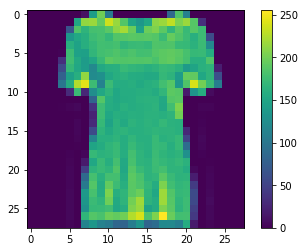

In [0]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

Antes de alimentar la red neuronal, vamos a normalizar los datos que se encuentran en el dataset.

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

Comprobemos que esten en el formato adecuado y mostremos las primeras 25 imágenes.

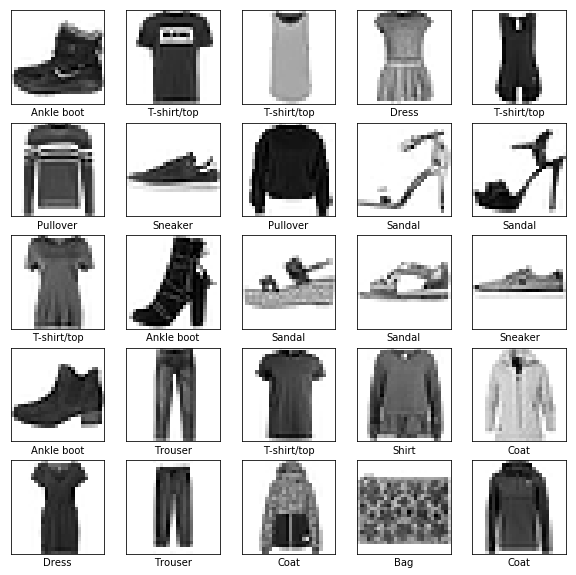

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Procedemos a construir el modelo de red neuronal, crearemos capas o layers con keras.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

W0123 16:43:41.554674  6368 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Esta es la primera capa de la red, con flatten se transforma el formato a unidimensional de las imágenes, las capas dense de 128 nodos y 10 nodos están conectadas, cada nodo contiene una calificación que indica la probabilidad de que la imagen que entra pertenezca a una clase.

Antes de entrenar y compilar el modelo, configuramos la función de pérdida, optimizador y métricas que se utilizan para monitorear los pasos de entrenamiento y pruebas.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Llamamos el método model.fit para ajustar los datos al modelo de entrenamiento.

In [0]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4990 - acc: 0.8252
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3739 - acc: 0.8654
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3377 - acc: 0.8775
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3140 - acc: 0.8854
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2953 - acc: 0.8910
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2819 - acc: 0.8958
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2670 - acc: 0.9020
Epoch 8/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2585 - acc: 0.9036
Epoch 9/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2480 - acc: 0.9075
Epoch 10/10
60000/60000 [==============================] - 5s 78us/sample - loss: 

El modelo alcanza un 91% de exactitud sobre el set de datos de entrenamiento.

Se evalúa la exactitud sobre el set de pruebas.

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3362 - acc: 0.8830

Test accuracy: 0.883


Se obtiene una exactitud del 88%, esta diferencia se debe al sobre ajuste y ocurre cuando un modelo de aprendizaje tiene peor exactitud que con el set de entrenamiento, dado que nunca lo ha visto.

Finalmente, se deben hacer predicciones puesto que es el objetivo del modelo.

In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([9.2087021e-08, 1.8766484e-07, 2.2918250e-08, 1.7076043e-06,
       1.6293217e-08, 8.5158134e-04, 6.9111024e-08, 1.2282763e-01,
       5.9402009e-08, 8.7631857e-01], dtype=float32)

La predicción es un arreglo de 10 números, indican el nivel de  "confianza" del modelo sobre las imágenes de cada uno de los artículos. Se utiliza el comando argmax para ver cuál de todos tiene mayor probabilidad.

In [0]:
np.argmax(predictions[0])

9

El modelo que la imagen 0 es una "Ankle Boot" como su predicción. A continuación verificamos si es correcta o no.

In [0]:
test_labels[0]

9

Efectivamente, es correcta.